In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [4]:
df_kanzler = pd.read_csv("data/tokped_kanzler.csv")
df_fiesta = pd.read_csv("data/tokped_fiesta.csv")

## Handling NaN values

In [5]:
# check null values
print(df_kanzler.isnull().sum())
print(df_fiesta.isnull().sum())

nama_produk         0
harga_produk        0
penjual            12
lokasi_toko        12
jumlah_terjual     65
rating_produk     111
dtype: int64
nama_produk        80
harga_produk       80
penjual            80
lokasi_toko        80
jumlah_terjual    539
rating_produk     694
dtype: int64


In [6]:
# remove null values
df_kanzler_clean = df_kanzler.dropna()
df_fiesta_clean = df_fiesta.dropna()

In [7]:
# check before and after removing null values
print(df_kanzler.shape)
print(df_kanzler_clean.shape)

(2518, 6)
(2395, 6)


In [8]:
print(df_fiesta.shape)
print(df_fiesta_clean.shape)

(2539, 6)
(1845, 6)


## Data Cleaning

#### Kanzler

In [9]:
# Syntax to change symbols that are not used in values
df_kanzler_clean['harga_produk'].replace('Rp','', regex=True, inplace=True)
df_kanzler_clean['harga_produk'].replace('\.','', regex=True, inplace=True)
df_kanzler_clean['jumlah_terjual'].replace('\+ terjual','', regex=True, inplace=True)
df_kanzler_clean['jumlah_terjual'].replace('terjual','', regex=True, inplace=True)
df_kanzler_clean['jumlah_terjual'].replace('rb',"000", regex=True, inplace=True)

/tmp/ipykernel_179768/2839499909.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_kanzler_clean['harga_produk'].replace('Rp','', regex=True, inplace=True)
/tmp/ipykernel_179768/2839499909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kanzler_clean['harga_produk'].replace('Rp','', regex=True, inplace=True)
/tmp/ipykernel_179768/2

In [10]:
df_kanzler_clean.harga_produk = df_kanzler_clean.harga_produk.astype('int64')
df_kanzler_clean.jumlah_terjual = df_kanzler_clean.jumlah_terjual.astype('int64')

/tmp/ipykernel_179768/1789763389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kanzler_clean.harga_produk = df_kanzler_clean.harga_produk.astype('int64')
/tmp/ipykernel_179768/1789763389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kanzler_clean.jumlah_terjual = df_kanzler_clean.jumlah_terjual.astype('int64')


In [11]:
df_kanzler_clean = df_kanzler_clean.drop_duplicates()
df_kanzler_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1877 entries, 0 to 2512
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama_produk     1877 non-null   object 
 1   harga_produk    1877 non-null   int64  
 2   penjual         1877 non-null   object 
 3   lokasi_toko     1877 non-null   object 
 4   jumlah_terjual  1877 non-null   int64  
 5   rating_produk   1877 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 102.6+ KB


#### Fiesta

In [12]:
# Syntax to change symbols that are not used in values
df_fiesta_clean['harga_produk'].replace('Rp','', regex=True, inplace=True)
df_fiesta_clean['harga_produk'].replace('\.','', regex=True, inplace=True)
df_fiesta_clean['jumlah_terjual'].replace('\+ terjual','', regex=True, inplace=True)
df_fiesta_clean['jumlah_terjual'].replace('terjual','', regex=True, inplace=True)
df_fiesta_clean['jumlah_terjual'].replace('rb',"000", regex=True, inplace=True)

/tmp/ipykernel_179768/3095342735.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fiesta_clean['harga_produk'].replace('Rp','', regex=True, inplace=True)
/tmp/ipykernel_179768/3095342735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fiesta_clean['harga_produk'].replace('Rp','', regex=True, inplace=True)
/tmp/ipykernel_179768/309

In [13]:
df_fiesta_clean.harga_produk = df_fiesta_clean.harga_produk.astype('int64')
df_fiesta_clean.jumlah_terjual = df_fiesta_clean.jumlah_terjual.astype('int64')

/tmp/ipykernel_179768/1545875515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fiesta_clean.harga_produk = df_fiesta_clean.harga_produk.astype('int64')
/tmp/ipykernel_179768/1545875515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fiesta_clean.jumlah_terjual = df_fiesta_clean.jumlah_terjual.astype('int64')


In [14]:
df_fiesta_clean = df_fiesta_clean.drop_duplicates()
df_fiesta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1364 entries, 0 to 2533
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama_produk     1364 non-null   object 
 1   harga_produk    1364 non-null   int64  
 2   penjual         1364 non-null   object 
 3   lokasi_toko     1364 non-null   object 
 4   jumlah_terjual  1364 non-null   int64  
 5   rating_produk   1364 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 74.6+ KB


In [15]:
df_kanzler_clean['brand'] = 'Kanzler'
df_fiesta_clean['brand'] = 'Fiesta'

## Analisis Deskriftif

### Perbandingan rata-rata harga, jumlah_terjual, dan rating antara Kanzler dan Fiesta

In [16]:
concat_df = pd.concat([df_kanzler_clean, df_fiesta_clean], ignore_index=True)
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3241 entries, 0 to 3240
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama_produk     3241 non-null   object 
 1   harga_produk    3241 non-null   int64  
 2   penjual         3241 non-null   object 
 3   lokasi_toko     3241 non-null   object 
 4   jumlah_terjual  3241 non-null   int64  
 5   rating_produk   3241 non-null   float64
 6   brand           3241 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 177.4+ KB


In [17]:
avg_price = concat_df.groupby('brand').agg({'harga_produk': 'mean'})
avg_sold = concat_df.groupby('brand').agg({'jumlah_terjual': 'mean'})
avg_rating = concat_df.groupby('brand').agg({'rating_produk': 'mean'})

# Extracting values from DataFrames
avg_price_values = avg_price['harga_produk']
avg_sold_values = avg_sold['jumlah_terjual']
avg_rating_values = avg_rating['rating_produk']

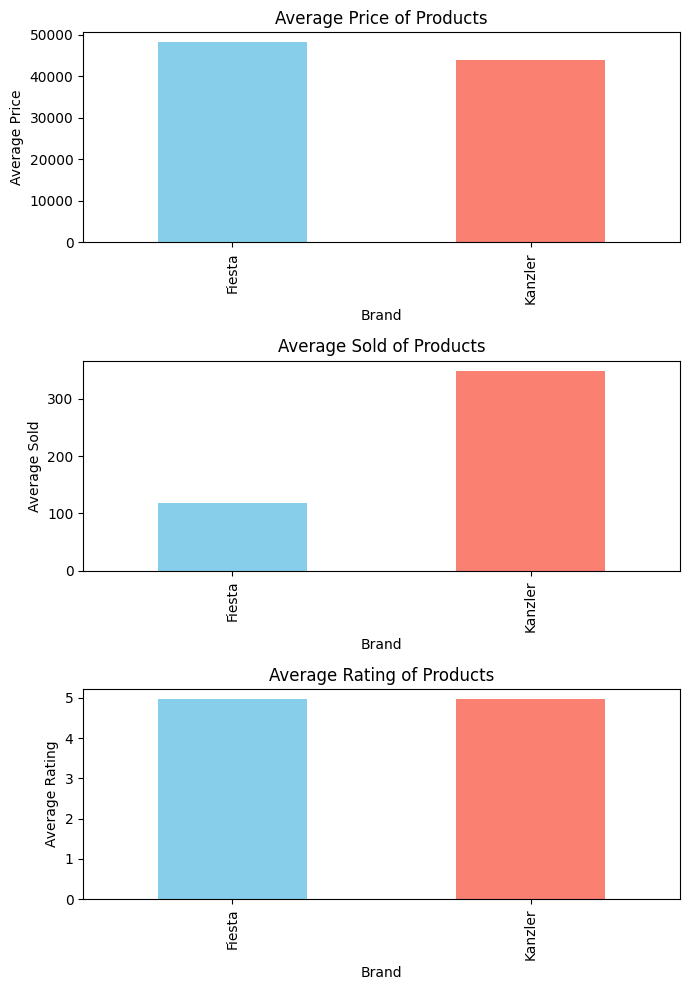

In [18]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(3, 1, figsize=(7, 10))

# Create a bar plot of average price
avg_price_values.plot(kind='bar', ax=ax[0], color=['skyblue', 'salmon'])
ax[0].set_title('Average Price of Products')
ax[0].set_ylabel('Average Price')
ax[0].set_xlabel('Brand')

# Create a bar plot of average sold
avg_sold_values.plot(kind='bar', ax=ax[1], color=['skyblue', 'salmon'])
ax[1].set_title('Average Sold of Products')
ax[1].set_ylabel('Average Sold')
ax[1].set_xlabel('Brand')

# Create a bar plot of average rating
avg_rating_values.plot(kind='bar', ax=ax[2], color=['skyblue', 'salmon'])
ax[2].set_title('Average Rating of Products')
ax[2].set_ylabel('Average Rating')
ax[2].set_xlabel('Brand')

plt.tight_layout()
plt.show()


### Perbandingan median harga, jumlah_terjual, dan rating antara Kanzler dan Fiesta

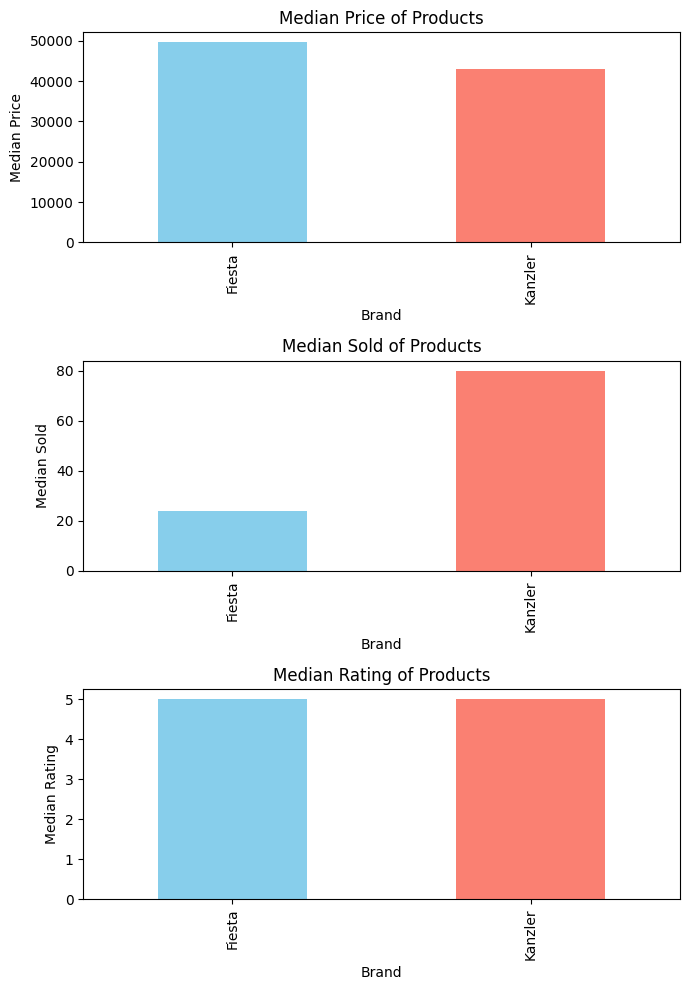

In [19]:
median_price = concat_df.groupby('brand').agg({'harga_produk': 'median'})
median_sold = concat_df.groupby('brand').agg({'jumlah_terjual': 'median'})
median_rating = concat_df.groupby('brand').agg({'rating_produk': 'median'})

# Extracting values from DataFrames
median_price_values = median_price['harga_produk']
median_sold_values = median_sold['jumlah_terjual']
median_rating_values = median_rating['rating_produk']

# Create a figure and a set of subplots
fig, ax = plt.subplots(3, 1, figsize=(7, 10))

# Create a bar plot of median price
median_price_values.plot(kind='bar', ax=ax[0], color=['skyblue', 'salmon'])
ax[0].set_title('Median Price of Products')
ax[0].set_ylabel('Median Price')
ax[0].set_xlabel('Brand')

# Create a bar plot of median sold
median_sold_values.plot(kind='bar', ax=ax[1], color=['skyblue', 'salmon'])
ax[1].set_title('Median Sold of Products')
ax[1].set_ylabel('Median Sold')
ax[1].set_xlabel('Brand')

# create a bar plot of median rating
median_rating_values.plot(kind='bar', ax=ax[2], color=['skyblue', 'salmon'])
ax[2].set_title('Median Rating of Products')
ax[2].set_ylabel('Median Rating')
ax[2].set_xlabel('Brand')

plt.tight_layout()
plt.show()

### Perbandingan distribusi harga, jumlah_terjual, dan rating antara Kanzler dan Fiesta

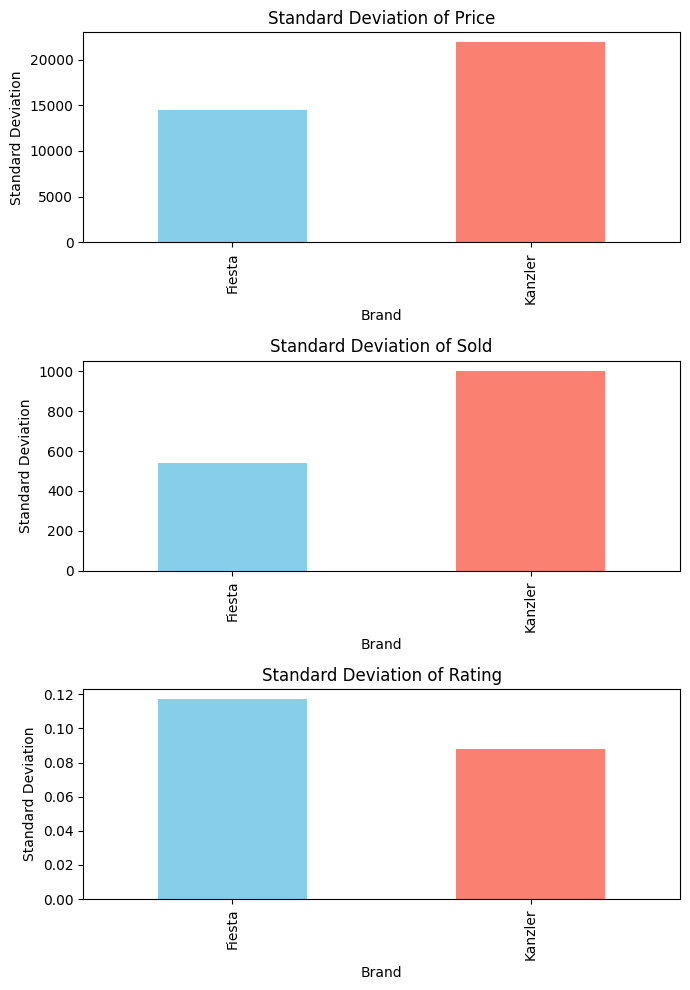

In [20]:
# Standard deviation of price, sold, and rating
std_price = concat_df.groupby('brand').agg({'harga_produk': 'std'})
std_sold = concat_df.groupby('brand').agg({'jumlah_terjual': 'std'})
std_rating = concat_df.groupby('brand').agg({'rating_produk': 'std'})


# Extracting values from DataFrames
std_price_values = std_price['harga_produk']
std_sold_values = std_sold['jumlah_terjual']
std_rating_values = std_rating['rating_produk']

# Create a figure and a set of subplots
fig, ax = plt.subplots(3, 1, figsize=(7, 10))

# Create a bar plot of standard deviation of price
std_price_values.plot(kind='bar', ax=ax[0], color=['skyblue', 'salmon'])
ax[0].set_title('Standard Deviation of Price')
ax[0].set_ylabel('Standard Deviation')
ax[0].set_xlabel('Brand')

# Create a bar plot of standard deviation of sold
std_sold_values.plot(kind='bar', ax=ax[1], color=['skyblue', 'salmon'])
ax[1].set_title('Standard Deviation of Sold')
ax[1].set_ylabel('Standard Deviation')
ax[1].set_xlabel('Brand')

# Create a bar plot of standard deviation of rating
std_rating_values.plot(kind='bar', ax=ax[2], color=['skyblue', 'salmon'])
ax[2].set_title('Standard Deviation of Rating')
ax[2].set_ylabel('Standard Deviation')
ax[2].set_xlabel('Brand')

plt.tight_layout()
plt.show()

In [21]:
print(std_price_values)
print(std_sold_values)
print(std_rating_values)

brand
Fiesta     14445.501214
Kanzler    21878.568152
Name: harga_produk, dtype: float64
brand
Fiesta      538.326615
Kanzler    1002.727613
Name: jumlah_terjual, dtype: float64
brand
Fiesta     0.117287
Kanzler    0.088260
Name: rating_produk, dtype: float64


1. Price:

- Fiesta: The standard deviation of the price for Fiesta products is 14445.501214. This means that prices of Fiesta products tend to vary around the average price by about 14445.501214 currency units (replace with your actual currency).
- Kanzler: The standard deviation of the price for Kanzler products is 21878.568152. This indicates that prices of Kanzler products have a wider variation around the average price compared to Fiesta products.

2. Number Sold:

- Fiesta: The standard deviation of the number of units sold for Fiesta is 538.326615. This means there's some variability in how many units of individual Fiesta products sell.
- Kanzler: The standard deviation of the number of units sold for Kanzler is 1002.727613. This suggests that the sales numbers for individual Kanzler products have even greater variability compared to Fiesta products.

3. Rating:

- Fiesta: The standard deviation of ratings for Fiesta is 0.117287. This implies that customer ratings for Fiesta products are relatively consistent, not deviating much from the average rating.
- Kanzler: The standard deviation of ratings for Kanzler is 0.088260. This shows that customer ratings for Kanzler products are even more consistent than Fiesta, clustering tightly around the average rating.

Key Takeaways

- Price Variability: Kanzler products generally have greater price variations than Fiesta products.
- Sales Variability: Kanzler products also exhibit higher sales variability compared to Fiesta.
- Rating Consistency: Both brands have fairly consistent ratings, but Kanzler's ratings are slightly more clustered around the average.

In [22]:
# df_fiesta_clean.to_csv('data/tokped_fiesta_clean.csv', index=False)
# df_kanzler_clean.to_csv('data/tokped_kanzler_clean.csv', index=False)

### Categorize Product

In [23]:
def categorize_product_name(product_name):
  product_name_lower = product_name.lower()

  nugget_keywords = ['nugget', 'nuggets', 'nuget']
  sausage_keywords = ['sausage', 'sosis', 'sosej', 'saussage']
  meatball_keywords = ['meatball', 'bakso', 'baso', 'baks']

  if any(keyword in product_name_lower for keyword in nugget_keywords) and any(keyword in product_name_lower for keyword in sausage_keywords):
    return 'Nugget-Sausage'
  elif any(keyword in product_name_lower for keyword in nugget_keywords) and any(keyword in product_name_lower for keyword in meatball_keywords):
    return 'Nugget-Meatball'
  elif any(keyword in product_name_lower for keyword in sausage_keywords) and any(keyword in product_name_lower for keyword in meatball_keywords):
    return 'Sausage-Meatball'
  elif any(keyword in product_name_lower for keyword in nugget_keywords):
    return 'Nugget'
  elif any(keyword in product_name_lower for keyword in sausage_keywords):
    return 'Sausage'
  elif any(keyword in product_name_lower for keyword in meatball_keywords):
    return 'Meatball'
  else:
    return 'Other'

In [24]:
# apply categorize_product_name function to product_name column
concat_df['product_category'] = concat_df['nama_produk'].apply(categorize_product_name)
concat_df['product_category'].value_counts()

product_category
Nugget              2207
Sausage              568
Other                422
Meatball              26
Nugget-Sausage        12
Sausage-Meatball       6
Name: count, dtype: int64

### Which Category Has the Highest Overall Sales?

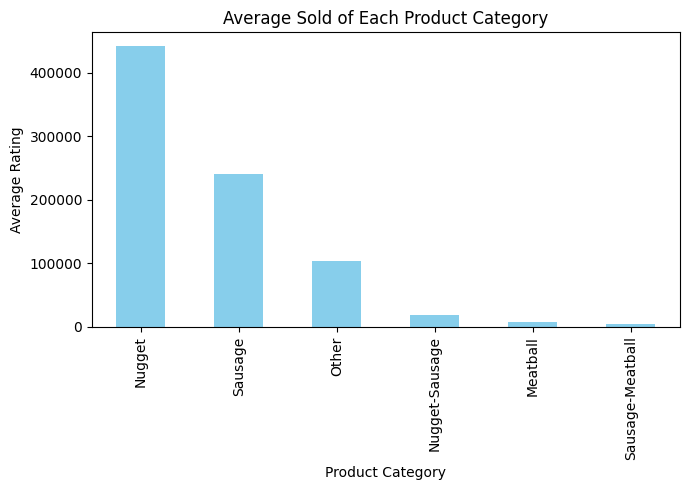

In [34]:
# Sum of sales for each product category
avg_rating_category = concat_df.groupby('product_category').agg({'jumlah_terjual': 'sum'})

# Extracting values from DataFrames
avg_rating_category_values = avg_rating_category['jumlah_terjual']

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(7, 5))

# Create a bar plot of average rating of each product category, sorted by the values
avg_rating_category_values = avg_rating_category_values.sort_values(ascending=False)
avg_rating_category_values.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Average Sold of Each Product Category')
ax.set_ylabel('Average Rating')
ax.set_xlabel('Product Category')

plt.tight_layout()
plt.show()

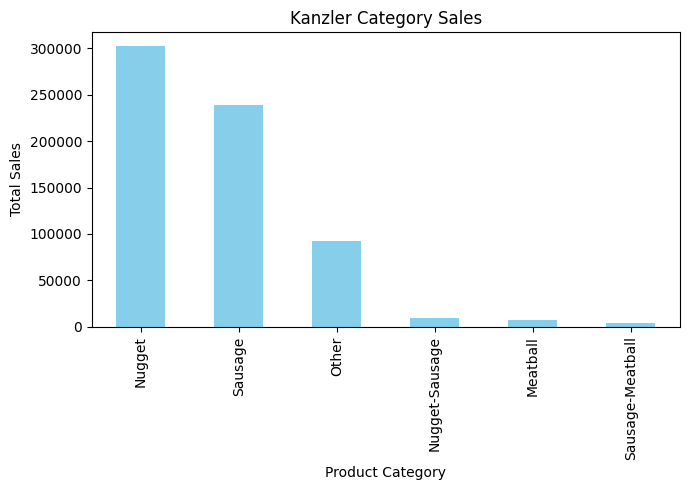

In [33]:
# Kanzler Category Sales
kanzler_category_sales = concat_df[concat_df['brand'] == 'Kanzler'].groupby('product_category').agg({'jumlah_terjual': 'sum'})

# Extracting values from DataFrames
kanzler_category_sales_values = kanzler_category_sales['jumlah_terjual']

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(7, 5))

# Create a bar plot of Kanzler category sales, sorted by the values
kanzler_category_sales_values = kanzler_category_sales_values.sort_values(ascending=False)
kanzler_category_sales_values.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Kanzler Category Sales')
ax.set_ylabel('Total Sales')
ax.set_xlabel('Product Category')

plt.tight_layout()
plt.show()

In [37]:
print(kanzler_category_sales)

                  jumlah_terjual
product_category                
Meatball                    7327
Nugget                    302174
Nugget-Sausage              9592
Other                      92798
Sausage                   238588
Sausage-Meatball            4260


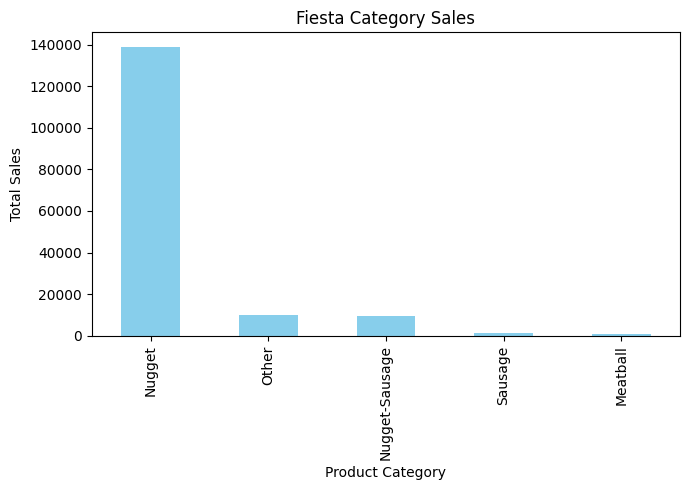

In [35]:
# Fiesta Category Sales
fiesta_category_sales = concat_df[concat_df['brand'] == 'Fiesta'].groupby('product_category').agg({'jumlah_terjual': 'sum'})

# Extracting values from DataFrames
fiesta_category_sales_values = fiesta_category_sales['jumlah_terjual']

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(7, 5))

# Create a bar plot of Fiesta category sales, sorted by the values
fiesta_category_sales_values = fiesta_category_sales_values.sort_values(ascending=False)
fiesta_category_sales_values.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Fiesta Category Sales')
ax.set_ylabel('Total Sales')
ax.set_xlabel('Product Category')

plt.tight_layout()
plt.show()

In [36]:
print(fiesta_category_sales)

                  jumlah_terjual
product_category                
Meatball                     591
Nugget                    138996
Nugget-Sausage              9505
Other                       9869
Sausage                     1114


### Average Sales By Brand

In [43]:
avg_rating_brand_category = concat_df.groupby(['brand', 'product_category']).agg({'jumlah_terjual': 'sum'})
avg_rating_brand_category = avg_rating_brand_category.reset_index()

# Create a pivot table
pivot_table = avg_rating_brand_category.pivot_table(index='product_category', columns='brand', values='jumlah_terjual')

pivot_table

brand,Fiesta,Kanzler
product_category,,
Meatball,591.0,7327.0
Nugget,138996.0,302174.0
Nugget-Sausage,9505.0,9592.0
Other,9869.0,92798.0
Sausage,1114.0,238588.0
Sausage-Meatball,NaN,4260.0


### Average Rating by Category

In [42]:
avg_rating_category = concat_df.groupby('product_category').agg({'rating_produk': 'mean'})
avg_rating_category_values = avg_rating_category['rating_produk']

print(avg_rating_category_values)

product_category
Meatball            4.950000
Nugget              4.967331
Nugget-Sausage      4.975000
Other               4.969905
Sausage             4.969894
Sausage-Meatball    4.950000
Name: rating_produk, dtype: float64


### Location Analysis

In [38]:
lokasi = concat_df.lokasi_toko.unique()
lokasi

array(['Jakarta Utara', 'Tangerang Selatan', 'Jakarta Barat',
       'Jakarta Pusat', 'Jakarta Selatan', 'Jakarta Timur', 'Surabaya',
       'Bekasi', 'Depok', 'Tangerang', 'Kab. Tangerang', 'Bandung',
       'Kab. Bogor', 'Denpasar', 'Kab. Bekasi', 'Medan', 'Kab. Karawang',
       'Malang', 'Yogyakarta', 'Palembang', 'Kab. Sleman', 'Semarang',
       'Kab. Sidoarjo', 'Makassar', 'Bogor', 'Pekanbaru', 'Cirebon',
       'Surakarta', 'Kab. Gresik', 'Samarinda', 'Kab. Bandung Barat',
       'Bandar Lampung', 'Kab. Bantul', 'Tasikmalaya', 'Kab. Bandung',
       'Balikpapan', 'Banjarmasin', 'Padang', 'Kab. Jember',
       'Kab. Sumenep', 'Kab. Cilacap', 'Cimahi', 'Kab. Badung',
       'Kab. Deli Serdang', 'Kab. Kediri', 'Kab. Kuningan', 'Cilegon',
       'Kab. Banyuwangi', 'Jambi', 'Kab. Garut', 'Metro'], dtype=object)

In [39]:
# which brand has the most products sold in each location
most_sold_products = concat_df.groupby(['lokasi_toko', 'brand']).agg({'jumlah_terjual': 'sum'}).reset_index()
most_sold_products = most_sold_products.sort_values('jumlah_terjual', ascending=False)
most_sold_products = most_sold_products.drop_duplicates(subset=['lokasi_toko'], keep='first')
most_sold_products

,lokasi_toko,brand,jumlah_terjual
26,Jakarta Timur,Kanzler,114384
20,Jakarta Barat,Kanzler,102601
24,Jakarta Selatan,Kanzler,90672
22,Jakarta Pusat,Kanzler,67541
28,Jakarta Utara,Kanzler,67232
84,Tangerang Selatan,Kanzler,57763
18,Depok,Kanzler,36576
82,Tangerang,Kanzler,26827
78,Surabaya,Kanzler,25351
7,Bekasi,Kanzler,23889


### Correlation Analysis

In [41]:
# correlation between price and sold
correlation = concat_df[['harga_produk', 'jumlah_terjual']].corr()
correlation

,harga_produk,jumlah_terjual
harga_produk,1.000000,-0.066258
jumlah_terjual,-0.066258,1.000000
